## 1. 考纽螺线形状像钟表发条，也称回旋曲线，它在直角坐标系中的参数方程为
$$ \left\{
    \begin{align} % \begin{eqnarray}好像也可以。
    x(s)&=\int_0^scos\frac{1}{2}at^2\\
    y(s)&=\int_0^ssin\frac{1}{2}at^2
    \end{align}
    \right.$$
## 曲线关于原点对称，取$a=1$,参数s变化范围[-5,5]，容许误差限分别是$10^{-6}$和$10^{-10}$，选取适当的节点个数，利用数值积分方法计算曲线上点的坐标，并画出曲线的图形。

### 解：采用复化Simpson公式对函数$f$进行近似，若将积分区间[a,b]分成n份，即连边界共n+1 个节点，记 $h=\frac{b-a}{n}$. 则其理论误差限$|R_n|\leq \frac{b-a}{180}h^4M$，其中$M$是$|f^{(4)}|$在[a,b]内的最大值。求导后发现M比较难求，并使用事后误差估计，因此采用复化Simpson公式的逐次分半法进行求解，代码如下。

In [1]:
using Plots
#using SymEngine

a=1
max_iter=100
n=1000#画图用的节点数

1000

In [2]:
function x(t)
    return cos(0.5*t^2)
end
function y(t)
    return sin(0.5*t^2)
end

function simpsonIntegral(lowerbound,upperbound,f,ϵ,max_iter)
    m=1
    h=(upperbound-lowerbound)/2
    F1=f(lowerbound)+f(upperbound)
    F2=f((lowerbound+upperbound)/2)
    S0=(upperbound-lowerbound)/6*(F1+4*F2)
    m=2
    h=(upperbound-lowerbound)/4
    S=0
    for i=1:max_iter
#        for k=1:2^(m-1)
        k=1:2^(m-1)
        F=sum(f.(lowerbound.+(2 .*k.-1).*h))
        S=h/3*(F1+2*F2+4*F)
#        end
        if abs(S-S0)<15*ϵ
            return S
        else
            m+=1
            h=h/2
            F2=F2+F
            S0=S
        end
    end
    return S
end

simpsonIntegral (generic function with 1 method)

In [3]:
s_arr=collect(-5:10/(n-1):5)
xs=collect(-5:10/(n-1):5);
ys=collect(-5:10/(n-1):5);
i=1
for (idx,s) in enumerate(s_arr)
    xs[idx]=simpsonIntegral(0,s,x,10^(-6),max_iter)
    ys[idx]=simpsonIntegral(0,s,y,10^(-10),max_iter)
end
#ys,ylen=simpsonIntegral(lowerbound,upperbound,y,ϵ=10^(-10),max_iter)

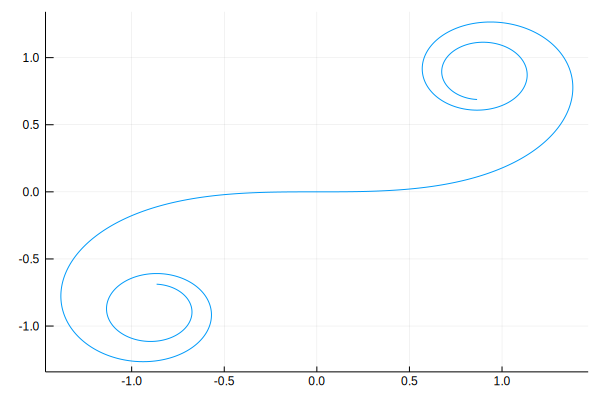

In [4]:
plot(xs,ys,legend=:none)